In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [24]:
demand_data=pd.read_csv('data\Demand_History.csv')
existing_ev=pd.read_csv('data\exisiting_EV_infrastructure_2018.csv')
a=pd.read_csv("best_one.csv")

In [7]:
demand_data.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563


In [8]:
existing_ev.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14
3,3,30.528626,55.379835,26,5,5
4,4,51.521781,35.116755,32,11,6


In [14]:
centroids=existing_ev.iloc[:,1:3]
data=demand_data.iloc[:,1:3]
# y=demand_data['y_coordinate']
# centroids

In [20]:
kmeans = KMeans(n_clusters = 100, init =centroids,algorithm='lloyd')
y_kmeans = kmeans.fit_predict(data)
data['label']=y_kmeans

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


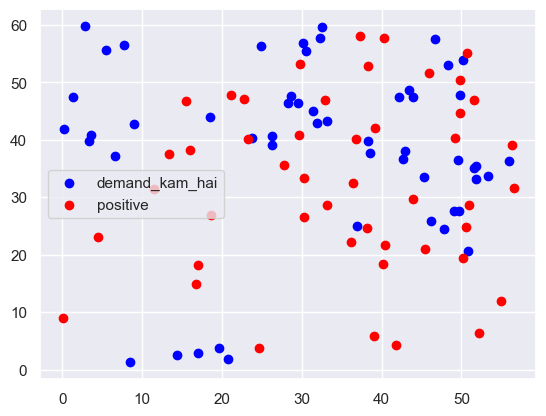

In [26]:
b=a[a['differnce']>0]
c=a[a['differnce']<0]

# plt.scatter(a['x_coordinate'],a['y_coordinate'])
plt.scatter(c['x_coordinate'],c['y_coordinate'],c='blue',label='demand_kam_hai')
plt.scatter(b['x_coordinate'],b['y_coordinate'],c='red',label='positive')
plt.legend()



In [31]:
c.shape

(53, 12)

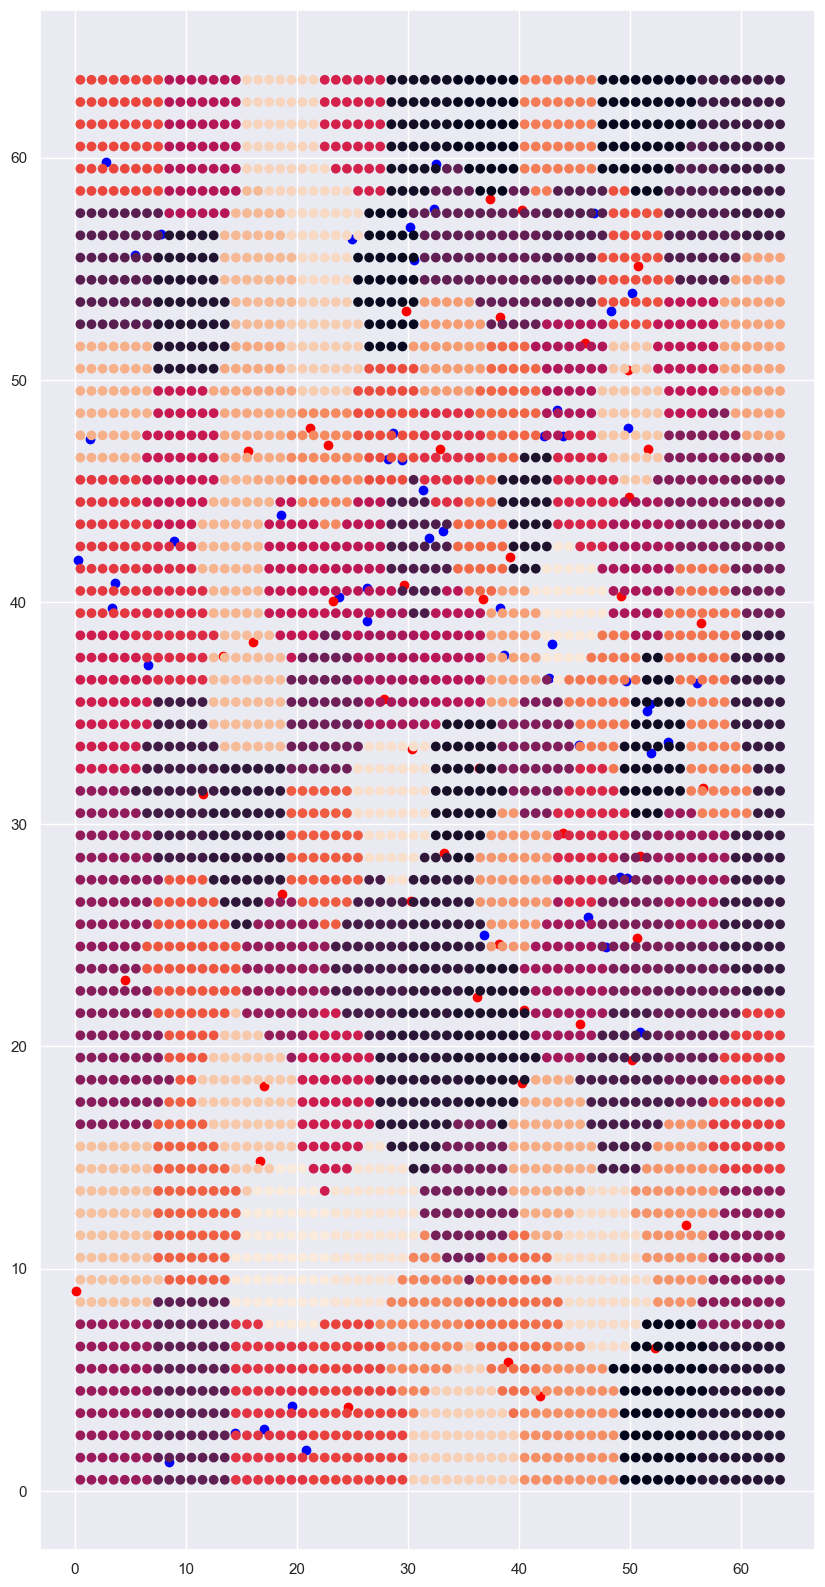

In [30]:
plt.figure(figsize=(10,20))
# plt.scatter(centroids.iloc[:,[0]],centroids.iloc[:,[1]],label='centroid',c='black')
plt.scatter(c['x_coordinate'],c['y_coordinate'],c='blue',label='demand_kam_hai')
plt.scatter(b['x_coordinate'],b['y_coordinate'],label='positive',c='red')
plt.scatter(data.iloc[:,[0]],data.iloc[:,[1]],label='class',c=data['label'])